In [2]:
# Load libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import sklearn as sk

import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('CKD_clean.csv')

# Part 1.
### Risk Factors for CKD

Let's look at the distributions of values for patients with and without CKD.

ValueError: num must be 1 <= num <= 16, not 17

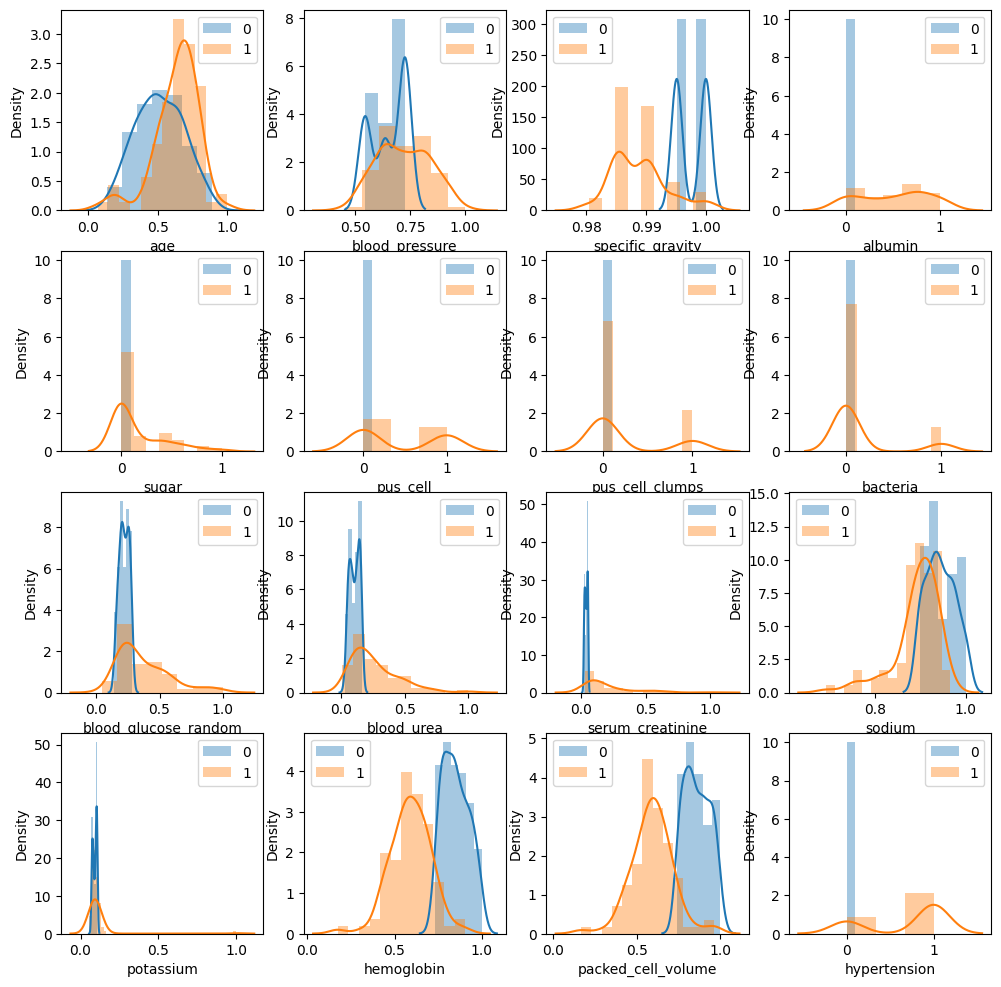

In [5]:
# graph distributions of every variable for class 0 and 1

plt.figure(figsize=(12,12))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    sns.distplot(df.loc[df['class'] == 0, col], label='0')
    sns.distplot(df.loc[df['class'] == 1, col], label='1')
    plt.legend()
plt.show()

Most of these features seam to be bimodal in both classes...

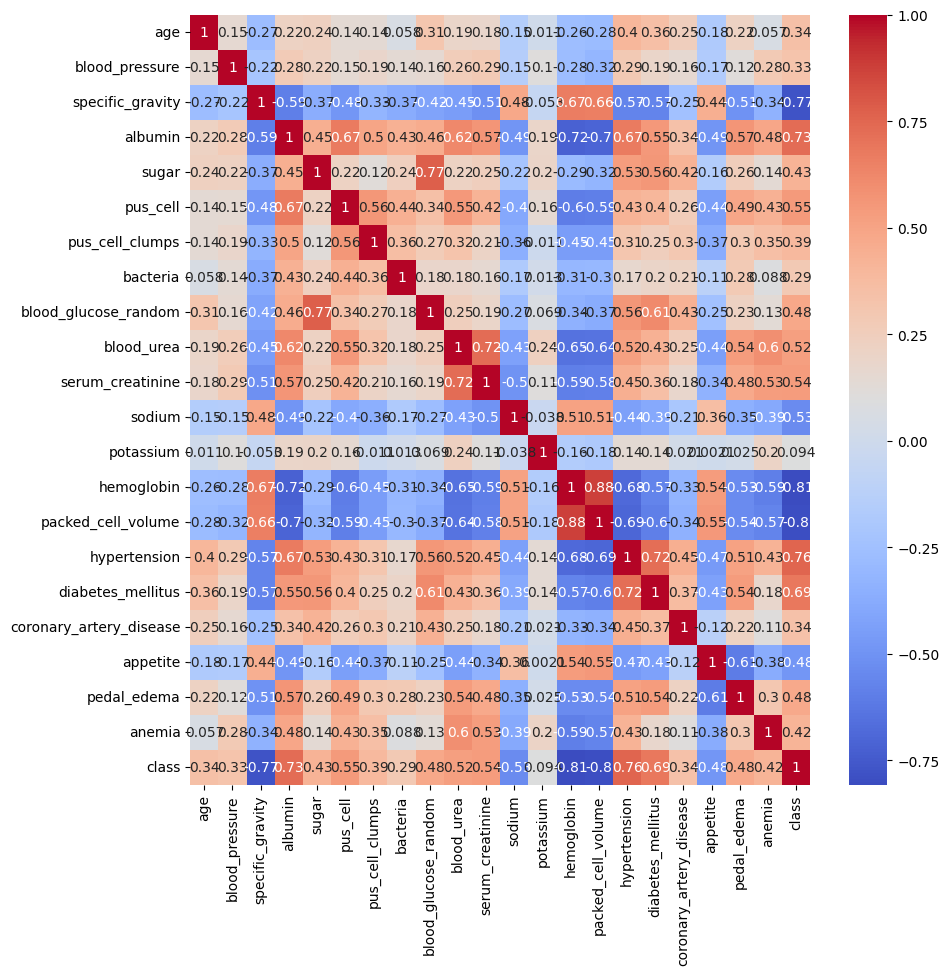

In [7]:
# correlation matrix
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

The most onviously correlated features to the target class are hypertension, albumin, diabetes_mellitus, pus_cell, serum_creatine, and blood_urea.

So, we may say that people with hypertension, who are diabetic or in danger of being diabetic and who are losing protein are at great risk.

# Part 2.
#### Potential CKD Subtypes

As noted earlier, both classes for the dependent variable seem to be bimodal in many cases.  This suggests that there should be two subtypes.

We should take a look at the features and see if any binary features stick out.

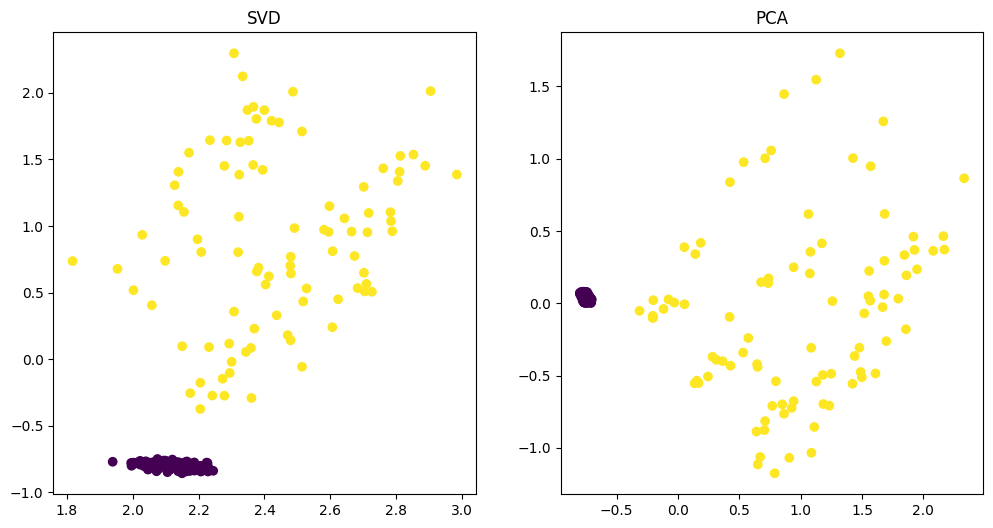

In [9]:
# singular value decomposition
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd.fit(df)
svd.explained_variance_ratio_

# principal component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)
pca.explained_variance_ratio_

# graph SVD and PCA side by side
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(svd.fit_transform(df)[:,0], svd.fit_transform(df)[:,1], c=df['class'])
plt.title('SVD')
plt.subplot(1, 2, 2)
plt.scatter(pca.fit_transform(df)[:,0], pca.fit_transform(df)[:,1], c=df['class'])
plt.title('PCA')
plt.show()


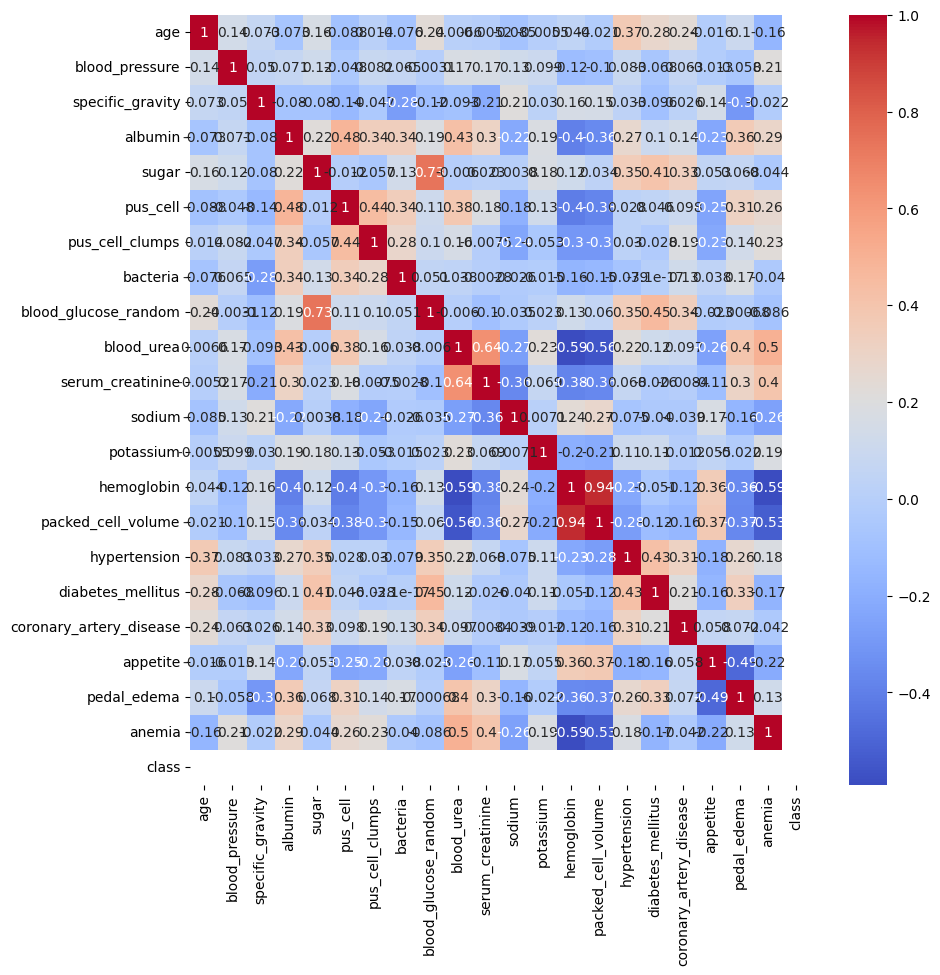

In [10]:
# dataframe of just the postive class
df_pos = df.loc[df['class'] == 1]

# dataframe of just the negative class
df_neg = df.loc[df['class'] == 0]

# correlation matrix for positive class
corr_pos = df_pos.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_pos, annot=True, cmap='coolwarm')
plt.show()

diabetes_mellitus is highly correlated with 

### Clustering

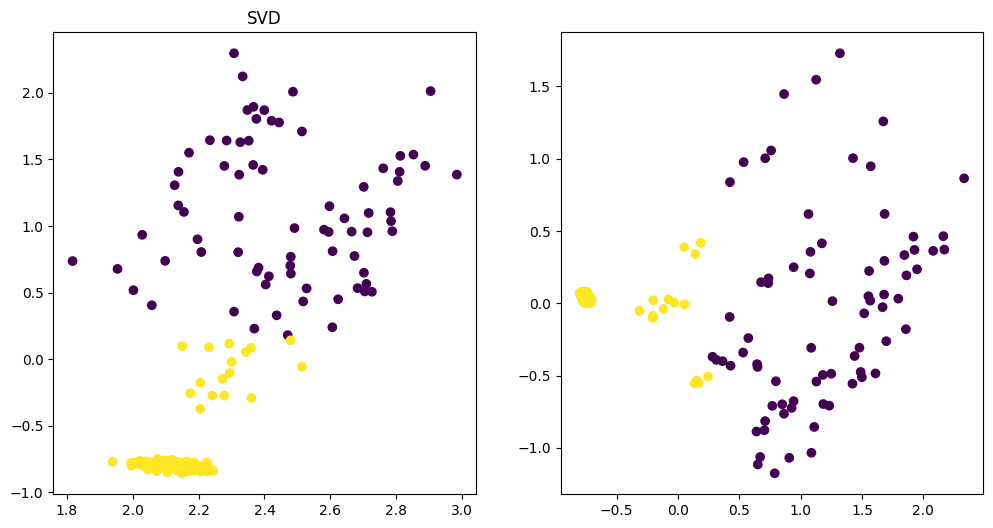

In [20]:
# K-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
kmeans.cluster_centers_
kmeans.labels_

# graph K-means clustering
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(svd.fit_transform(df)[:,0], svd.fit_transform(df)[:,1], c=kmeans.labels_)
plt.title('SVD')
plt.subplot(1, 2, 2)
plt.scatter(pca.fit_transform(df)[:,0], pca.fit_transform(df)[:,1], c=kmeans.labels_)


It seems fairly clear that there are two subclasses.  Based on the correlations above and the closeness of the one subclass, I expect to see similar results from other algorithms.

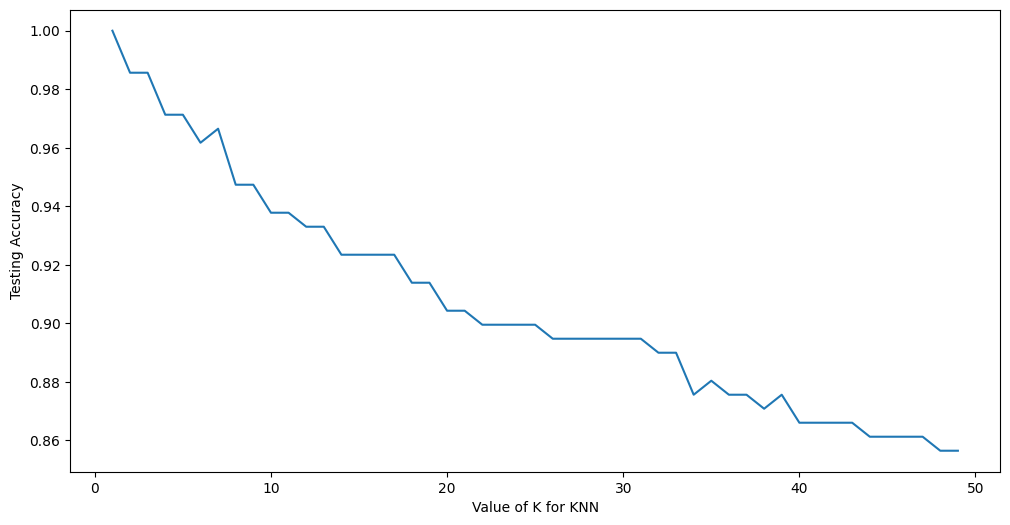

In [21]:

# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(df.drop('class', axis=1), df['class'])
knn.score(df.drop('class', axis=1), df['class'])

# Plot KNN accuracy for different values of k
k_range = range(1, 50)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df.drop('class', axis=1), df['class'])
    scores.append(knn.score(df.drop('class', axis=1), df['class']))
plt.figure(figsize=(12,6))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

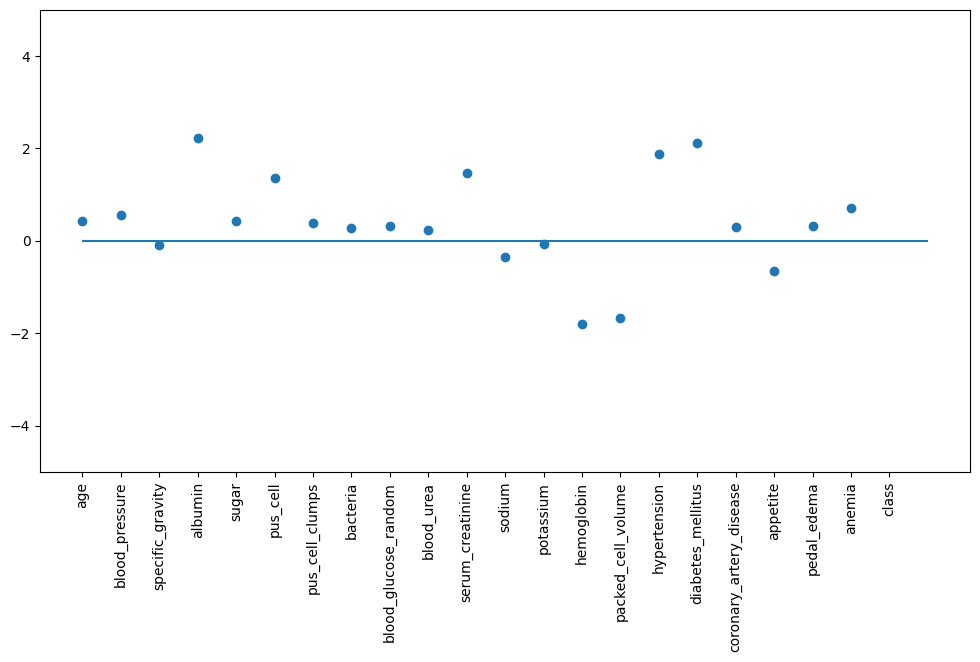

In [27]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(df.drop('class', axis=1), df['class'])
lr.score(df.drop('class', axis=1), df['class'])

# plot Logistic Regression coefficients
plt.figure(figsize=(12,6))
plt.plot(lr.coef_.T, 'o')
plt.xticks(range(df.shape[1]), df.columns, rotation=90)
plt.hlines(0, 0, df.shape[1])
plt.ylim(-5, 5)
plt.show()


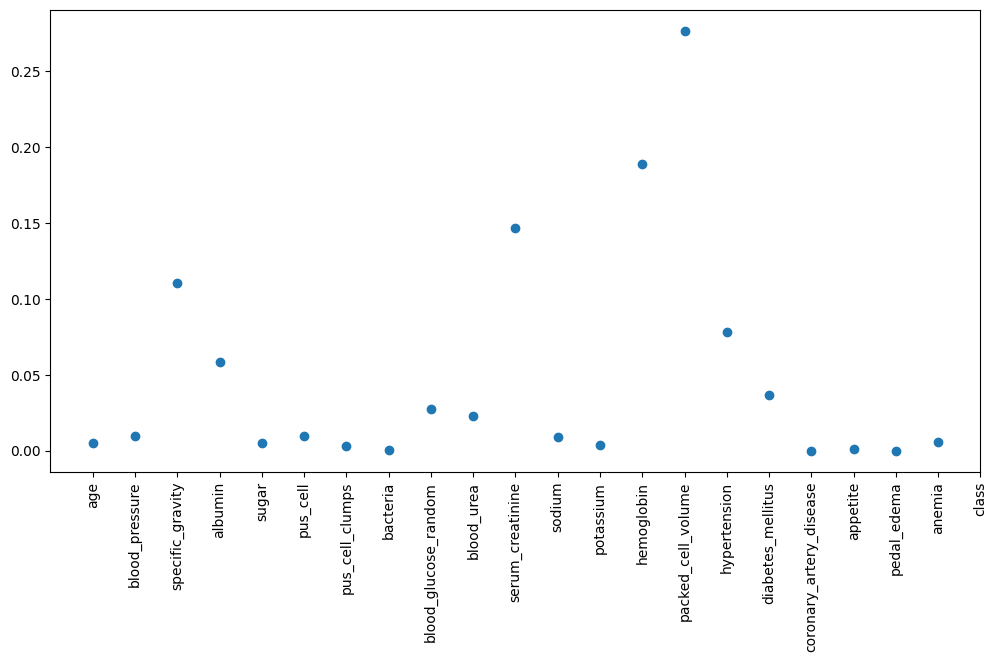

In [28]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(df.drop('class', axis=1), df['class'])
rf.score(df.drop('class', axis=1), df['class'])

# plot feature importances
plt.figure(figsize=(12,6))
plt.plot(rf.feature_importances_, 'o')
plt.xticks(range(df.shape[1]), df.columns, rotation=90)
plt.show()


Based on these graphs and the correlation data, it seems that there are two main groups, one of which is possibly diabetic and whose kidneys are no longer removing waste from the blood.

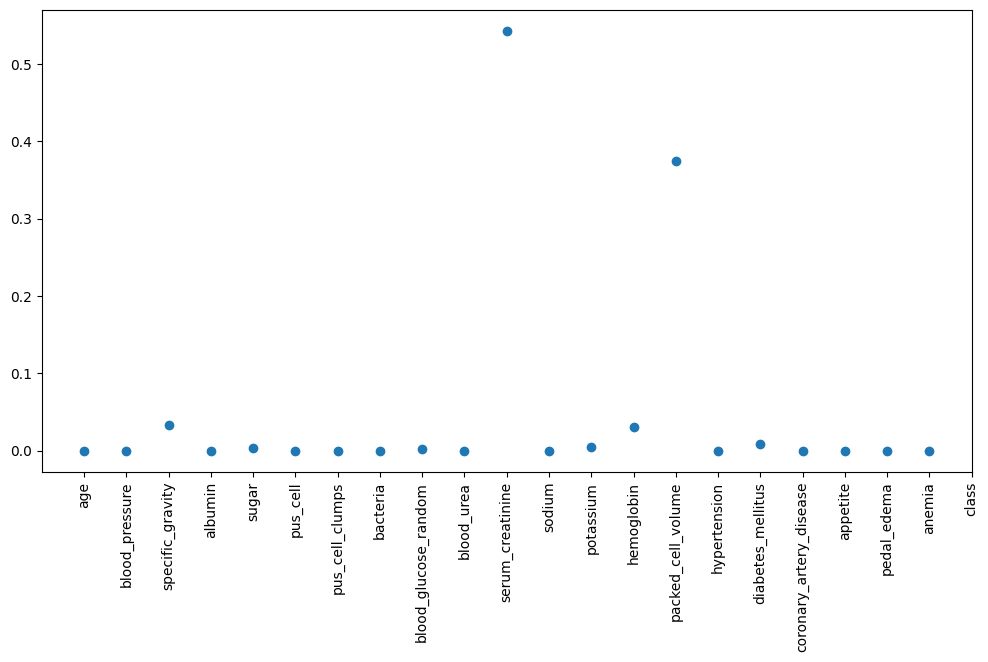

In [29]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(df.drop('class', axis=1), df['class'])
gb.score(df.drop('class', axis=1), df['class'])

# plot gradient boosting feature importances
plt.figure(figsize=(12,6))
plt.plot(gb.feature_importances_, 'o')
plt.xticks(range(df.shape[1]), df.columns, rotation=90)
plt.show()


### Conclusions

There is probably a severe subtype that is highly degenerative, with ammonia and protein not actively being removed from the blood.  It seems there is a connection with high blood sugar levels.  Possibly, there are two subtypes, one which probably leads to kidney failure and is linked to diabetes, and another type which is more manageable.

Proceed to "predictions.ipynb" for the naive Bayes classifier.